In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [71]:
data =pd.read_csv('/content/crime_data.csv')
data.head()


,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [72]:
data.shape

(50, 5)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [74]:
data.columns

Index(['Place', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [75]:
#using minmax scaler function
#transformation of single column needs "values.reshape(-1,1)"
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
data[['Murder', 'Assault','UrbanPop','Rape']]=ms.fit_transform(data[['Murder', 'Assault','UrbanPop','Rape']])

In [76]:
data_norm = data.iloc[:,1:]

In [77]:
data_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


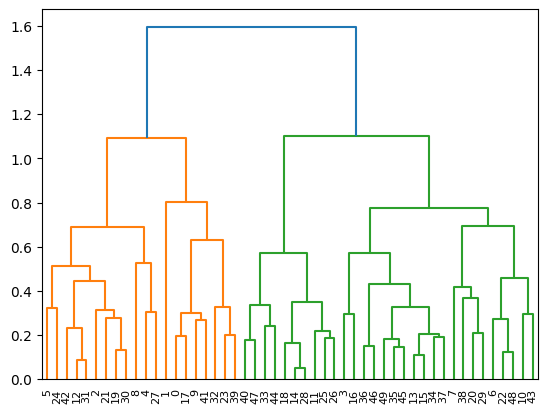

In [78]:
# create dendrogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(data_norm, method='complete'))
plt.show()

In [79]:
# create clusters
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [80]:
hc.fit(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [81]:
yhc = hc.fit_predict(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [82]:
yhc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [83]:
data["clusters"] = yhc
data

,Place,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,0.746988,0.654110,0.440678,0.359173,3
1,Alaska,0.554217,0.746575,0.271186,0.961240,4
2,Arizona,0.439759,0.852740,0.813559,0.612403,1
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0
4,California,0.493976,0.791096,1.000000,0.860465,1
5,Colorado,0.427711,0.544521,0.779661,0.811370,1
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0
7,Delaware,0.307229,0.660959,0.677966,0.219638,0
8,Florida,0.879518,0.993151,0.813559,0.635659,1
9,Georgia,1.000000,0.568493,0.474576,0.478036,3


In [84]:
data1 = data.sort_values("clusters")
data1

,Place,Murder,Assault,UrbanPop,Rape,clusters
49,Wyoming,0.361446,0.397260,0.474576,0.214470,0
20,Massachusetts,0.216867,0.356164,0.898305,0.232558,0
29,New Jersey,0.397590,0.390411,0.966102,0.297158,0
16,Kentucky,0.536145,0.219178,0.338983,0.232558,0
15,Kansas,0.313253,0.239726,0.576271,0.276486,0
34,Ohio,0.391566,0.256849,0.728814,0.364341,0
13,Indiana,0.385542,0.232877,0.559322,0.354005,0
35,Oklahoma,0.349398,0.363014,0.610169,0.328165,0
22,Minnesota,0.114458,0.092466,0.576271,0.196382,0
10,Hawaii,0.271084,0.003425,0.864407,0.333333,0


In [85]:
data1[["Place","clusters"]]

,Place,clusters
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


# K means

In [86]:
from sklearn.cluster import KMeans

In [87]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

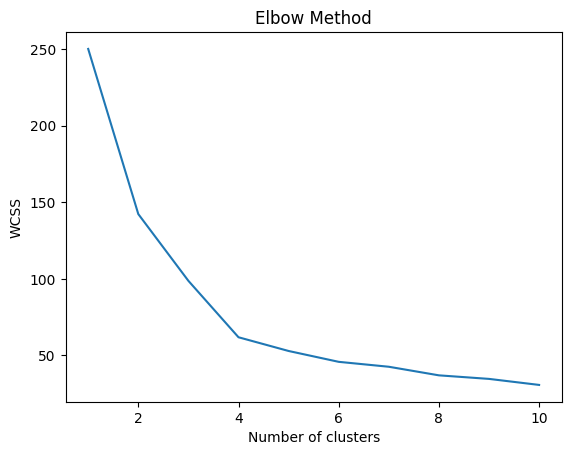

In [88]:
#How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [90]:
clusters_new.labels_

array([2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1,
       0, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 0, 0], dtype=int32)

In [91]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [92]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.48078097, -0.46618139,  0.36708043, -0.33778218, -0.99209233],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715, -0.1218359 ],
       [ 1.4610129 ,  0.99381728, -0.84023734,  0.35649393,  1.72745902],
       [-1.0687114 , -1.11587777, -1.13334338, -1.03556337,  0.74842053]])

In [93]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

<ipython-input-93-348825e5f3f9>:1: FutureWarning: ['Place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,0,0.296084,0.298973,0.657627,0.279070,0.000
1,1,0.607430,0.725742,0.785311,0.644703,1.000
2,2,0.800452,0.711473,0.364407,0.445413,3.125
3,3,0.143373,0.115411,0.293220,0.111886,2.000


In [94]:
data

,Place,Murder,Assault,UrbanPop,Rape,clusters,clusterid_new
0,Alabama,0.746988,0.654110,0.440678,0.359173,3,2
1,Alaska,0.554217,0.746575,0.271186,0.961240,4,2
2,Arizona,0.439759,0.852740,0.813559,0.612403,1,1
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0,0
4,California,0.493976,0.791096,1.000000,0.860465,1,1
5,Colorado,0.427711,0.544521,0.779661,0.811370,1,1
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0,0
7,Delaware,0.307229,0.660959,0.677966,0.219638,0,0
8,Florida,0.879518,0.993151,0.813559,0.635659,1,1
9,Georgia,1.000000,0.568493,0.474576,0.478036,3,2


# DBSCAN

In [95]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [96]:
data1 =pd.read_csv('/content/crime_data.csv')
data1.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [97]:
data2 = data1.iloc[ : ,1:5 ]
data2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [98]:
d2 =data2.values

In [99]:
stscaler = StandardScaler().fit(d2)
X = stscaler.transform(d2)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [100]:
dbscan = DBSCAN(eps=2, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=6)

In [101]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [102]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [103]:
pd.concat([data2,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
